In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read all files
price_day_0_df = pd.read_csv("prices_round_1_day_0.csv", sep=";")
price_day_1_df = pd.read_csv("prices_round_1_day_-1.csv", sep=";")
price_day_2_df = pd.read_csv("prices_round_1_day_-2.csv", sep=";")

trade_day_0_df = pd.read_csv("trades_round_1_day_0.csv", sep=";")
trade_day_1_df = pd.read_csv("trades_round_1_day_-1.csv", sep=";")
trade_day_2_df = pd.read_csv("trades_round_1_day_-2.csv", sep=";")

In [3]:
# resin is always stable during the !!! whole !!! history
# 

# First investigate only Resin

In [4]:
# extract the resin price only
resin_price_day_0 = price_day_0_df[price_day_0_df["product"] == "RAINFOREST_RESIN"]
resin_price_day_1 = price_day_1_df[price_day_1_df["product"] == "RAINFOREST_RESIN"]
resin_price_day_2 = price_day_2_df[price_day_2_df["product"] == "RAINFOREST_RESIN"]

# extract the resin trade only 
resin_trade_day_0 = trade_day_0_df[trade_day_0_df["symbol"] == "RAINFOREST_RESIN"]
resin_trade_day_1 = trade_day_1_df[trade_day_1_df["symbol"] == "RAINFOREST_RESIN"]
resin_trade_day_2 = trade_day_2_df[trade_day_2_df["symbol"] == "RAINFOREST_RESIN"]

In [5]:
# all info length is the same 10,000 pieces of data lines
# always have bid and ask quotes

In [6]:
# calculate the mean price of the resin of three days trades mid_price (get insights of what should be the real market price)
print(resin_price_day_0["mid_price"].mean())
print(resin_price_day_1["mid_price"].mean())
print(resin_price_day_2["mid_price"].mean())

9999.99975
9999.9864
10000.0035


In [7]:
# conclusion: 10000 is the mean reverted price, 9999 and 10001 are the short long starting points (mean reversion product)
# strategy: how to set the trading rules?

In [8]:
# 查询三天的挂单量 day1: 2407/10000 timestamp成交 day2: 2388/10000 day3: 2450

# 每笔最大成交量12
print(max(resin_trade_day_0["quantity"]))
print(max(resin_trade_day_1["quantity"]))
print(max(resin_trade_day_2["quantity"]))

12
12
12


In [9]:
# get the info of best ask and bid price: all 3 days are the same, 10002 and 9995
# no people bid 10001
print(resin_price_day_0[resin_price_day_0['bid_price_1'] >= 10000].shape)
print(resin_price_day_1[resin_price_day_1['bid_price_1'] >= 10000].shape)
print(resin_price_day_2[resin_price_day_2['bid_price_1'] >= 10000].shape)
print(resin_price_day_0[resin_price_day_0['ask_price_1'] < 10000].shape)
print(resin_price_day_1[resin_price_day_1['ask_price_1'] < 10000].shape)
print(resin_price_day_2[resin_price_day_2['ask_price_1'] < 10000].shape)

print(f"The max bid price of day 0 is: {max(resin_price_day_0['bid_price_1'])}")
print(f"The min ask price of day 0 is: {min(resin_price_day_0['ask_price_1'])}")

(1036, 17)
(987, 17)
(1093, 17)
(831, 17)
(825, 17)
(858, 17)
The max bid price of day 0 is: 10002
The min ask price of day 0 is: 9998


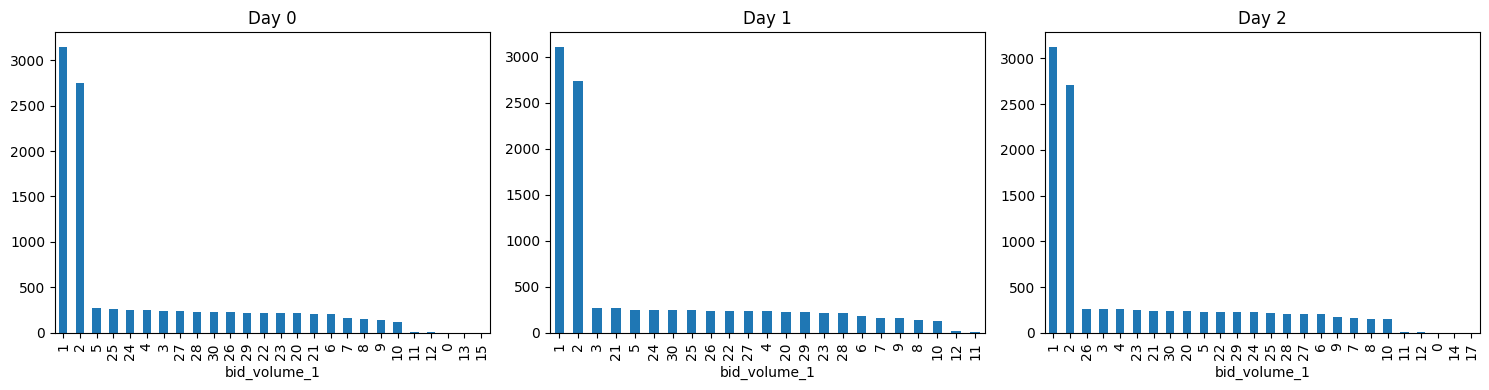

In [10]:
# best bid volume frequency
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

resin_price_day_0["bid_volume_1"].value_counts().plot(kind='bar', ax=axes[0], title='Day 0')
resin_price_day_1["bid_volume_1"].value_counts().plot(kind='bar', ax=axes[1], title='Day 1')
resin_price_day_2["bid_volume_1"].value_counts().plot(kind='bar', ax=axes[2], title='Day 2')

plt.tight_layout()
plt.show()

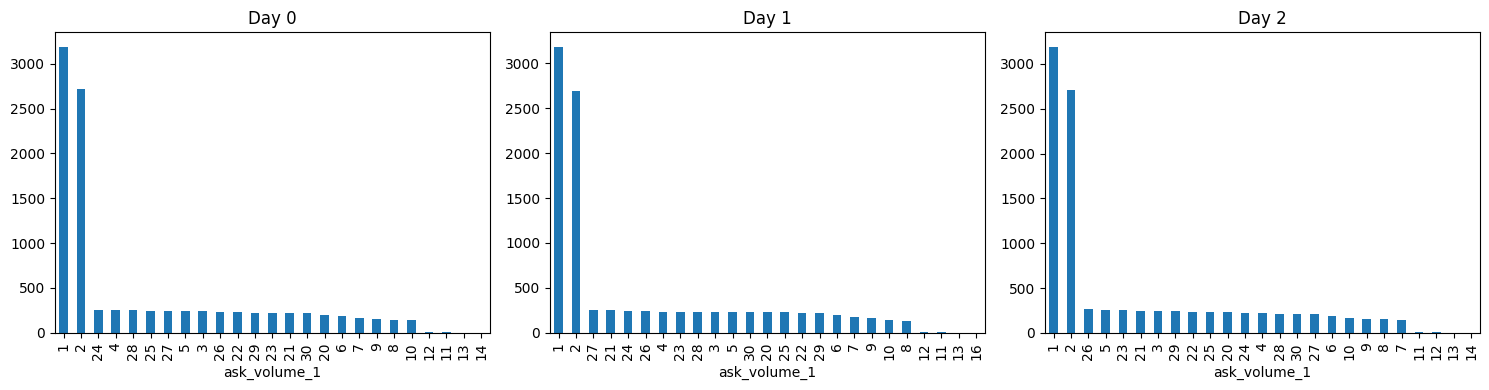

In [11]:
# best ask volume frequency
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

resin_price_day_0["ask_volume_1"].value_counts().plot(kind='bar', ax=axes[0], title='Day 0')
resin_price_day_1["ask_volume_1"].value_counts().plot(kind='bar', ax=axes[1], title='Day 1')
resin_price_day_2["ask_volume_1"].value_counts().plot(kind='bar', ax=axes[2], title='Day 2')

plt.tight_layout()
plt.show()

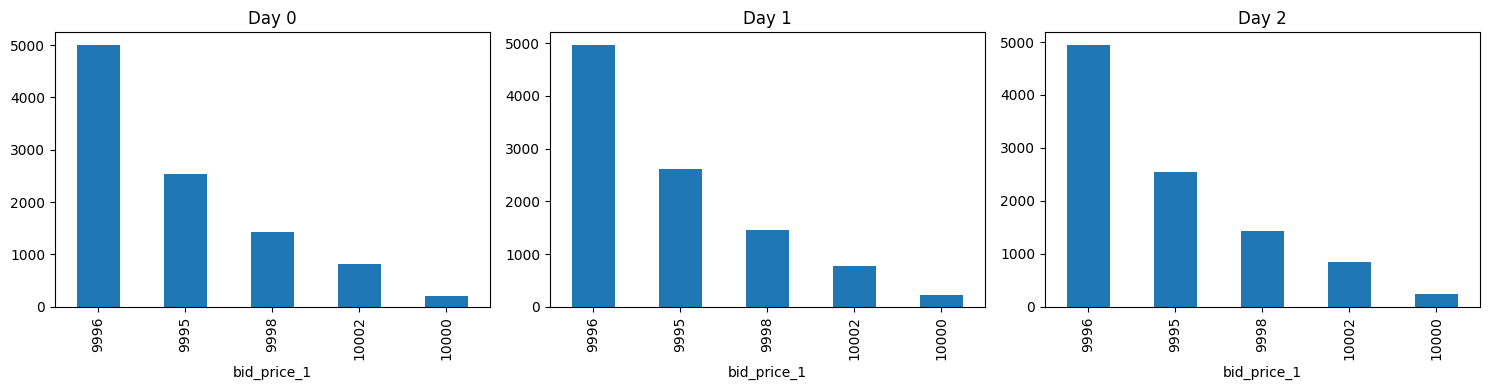

In [12]:
# best bid price frequency
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

resin_price_day_0["bid_price_1"].value_counts().plot(kind='bar', ax=axes[0], title='Day 0')
resin_price_day_1["bid_price_1"].value_counts().plot(kind='bar', ax=axes[1], title='Day 1')
resin_price_day_2["bid_price_1"].value_counts().plot(kind='bar', ax=axes[2], title='Day 2')

plt.tight_layout()
plt.show()

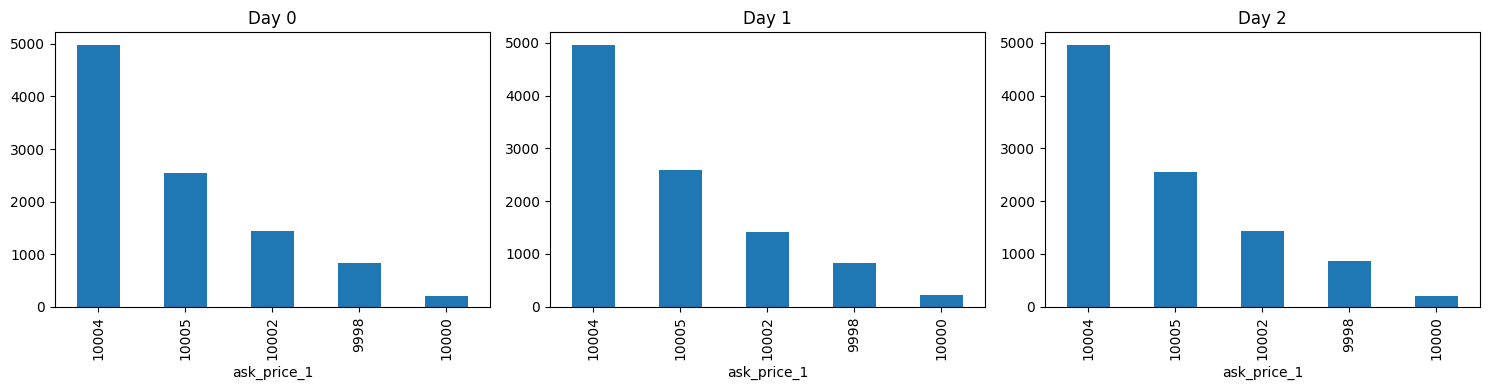

In [13]:
# best ask price frequency
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

resin_price_day_0["ask_price_1"].value_counts().plot(kind='bar', ax=axes[0], title='Day 0')
resin_price_day_1["ask_price_1"].value_counts().plot(kind='bar', ax=axes[1], title='Day 1')
resin_price_day_2["ask_price_1"].value_counts().plot(kind='bar', ax=axes[2], title='Day 2')

plt.tight_layout()
plt.show()

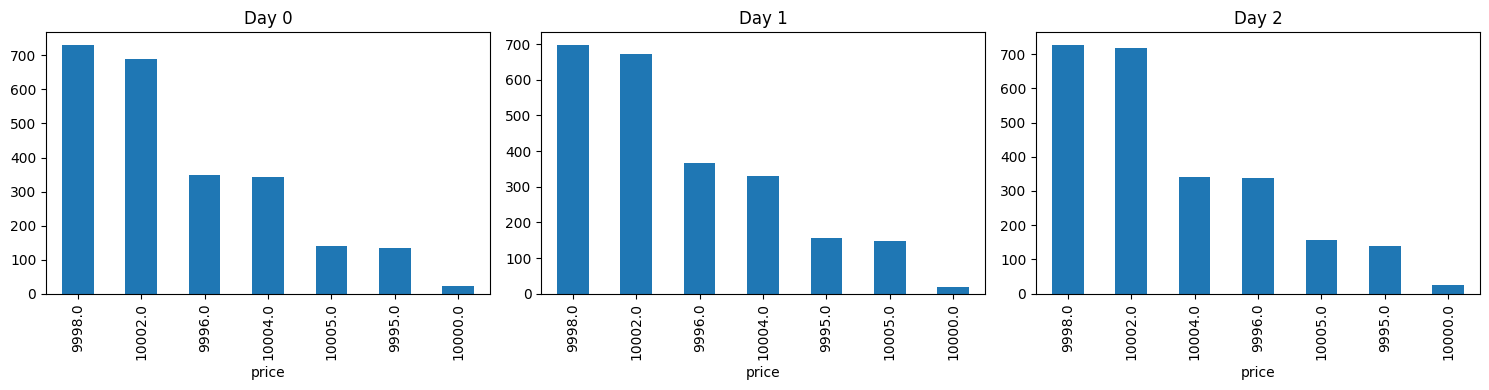

In [14]:
# trade price frequency
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

resin_trade_day_0["price"].value_counts().plot(kind='bar', ax=axes[0], title='Day 0')
resin_trade_day_1["price"].value_counts().plot(kind='bar', ax=axes[1], title='Day 1')
resin_trade_day_2["price"].value_counts().plot(kind='bar', ax=axes[2], title='Day 2')

plt.tight_layout()
plt.show()


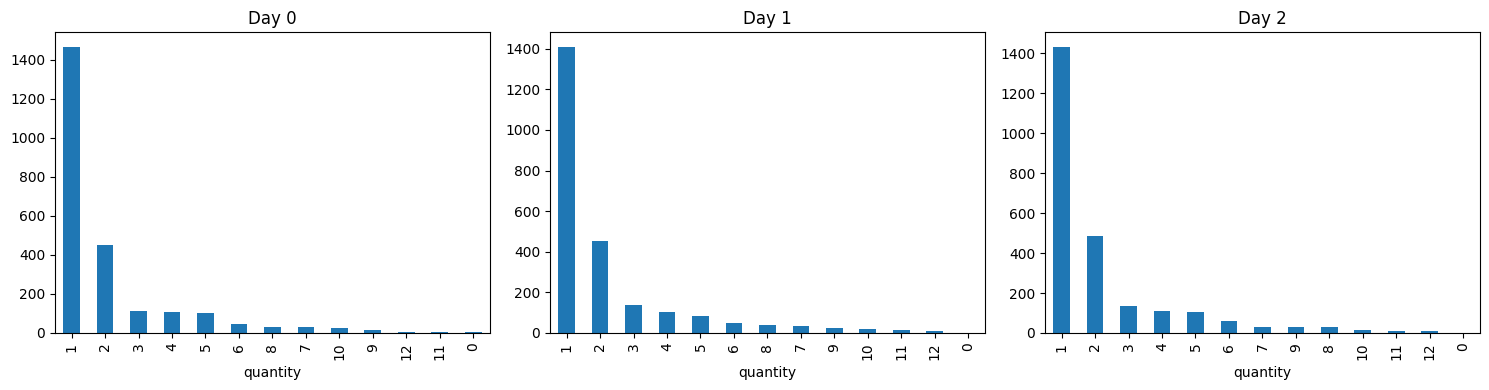

In [15]:
# trade quantity frequency
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

resin_trade_day_0["quantity"].value_counts().plot(kind='bar', ax=axes[0], title='Day 0')
resin_trade_day_1["quantity"].value_counts().plot(kind='bar', ax=axes[1], title='Day 1')
resin_trade_day_2["quantity"].value_counts().plot(kind='bar', ax=axes[2], title='Day 2')

plt.tight_layout()
plt.show()

In [16]:
price_day_0_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,RAINFOREST_RESIN,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,KELP,2028,30,NaN,NaN,NaN,NaN,2032,30,NaN,NaN,NaN,NaN,2030.0,0.0
2,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0
3,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN,1970.0,0.0
4,0,100,KELP,2030,4,2028.0,31.0,NaN,NaN,2032,31,NaN,NaN,NaN,NaN,2031.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999800,KELP,2032,27,NaN,NaN,NaN,NaN,2034,1,2035.0,27.0,NaN,NaN,2033.0,0.0
29996,0,999800,RAINFOREST_RESIN,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
29997,0,999900,RAINFOREST_RESIN,9996,2,9995.0,21.0,NaN,NaN,10004,2,10005.0,21.0,NaN,NaN,10000.0,0.0
29998,0,999900,SQUID_INK,1838,23,NaN,NaN,NaN,NaN,1841,23,NaN,NaN,NaN,NaN,1839.5,0.0


In [17]:
trade_day_0_df

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,10002.0,1
1,300,NaN,NaN,KELP,SEASHELLS,2029.0,6
2,300,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,2
3,300,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,1
4,300,NaN,NaN,SQUID_INK,SEASHELLS,1965.0,6
...,...,...,...,...,...,...,...
8177,999500,NaN,NaN,KELP,SEASHELLS,2032.0,2
8178,999500,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9995.0,2
8179,999500,NaN,NaN,SQUID_INK,SEASHELLS,1830.0,2
8180,999600,NaN,NaN,KELP,SEASHELLS,2032.0,1


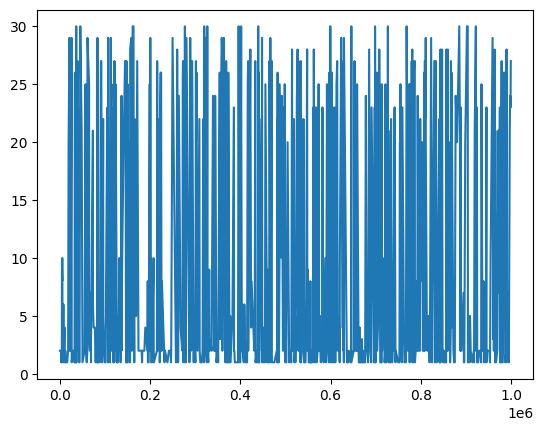

In [18]:
timestamps_1 = resin_price_day_0[(resin_price_day_0["bid_price_1"] > 10000)]["timestamp"]
volumes_1 = resin_price_day_0[(resin_price_day_0["bid_price_1"] > 10000)]["bid_volume_2"]

timestamps_2 = resin_price_day_0[(resin_price_day_0["bid_price_1"] > 10000)]["timestamp"]
volumes_2 = resin_price_day_0[(resin_price_day_0["bid_price_1"] > 10000)]["bid_volume_2"]

plt.plot(timestamps_1, volumes_1)


In [19]:
resin_price_day_0[(resin_price_day_0["ask_price_1"] < 10000) & (resin_price_day_0["ask_volume_1"] > 1)]["ask_volume_1"].sum()

np.int64(1545)

In [20]:
# high volume trade

resin_trade_day_0["quantity"].value_counts().plot(kind='bar', ax=axes[0], title='Day 0')
resin_trade_day_1["quantity"].value_counts().plot(kind='bar', ax=axes[1], title='Day 1')


<Axes: title={'center': 'Day 1'}, xlabel='quantity'>

In [21]:
resin_price_day_0[(resin_price_day_0["ask_price_2"] < 10000)]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss


# Second investigate kelp and ink

In [22]:
# extract the kelp price only
kelp_price_day_0 = price_day_0_df[price_day_0_df["product"] == "KELP"]
kelp_price_day_1 = price_day_1_df[price_day_1_df["product"] == "KELP"]
kelp_price_day_2 = price_day_2_df[price_day_2_df["product"] == "KELP"]

# extract the kelp trade only 
kelp_trade_day_0 = trade_day_0_df[trade_day_0_df["symbol"] == "KELP"]
kelp_trade_day_1 = trade_day_1_df[trade_day_1_df["symbol"] == "KELP"]
kelp_trade_day_2 = trade_day_2_df[trade_day_2_df["symbol"] == "KELP"]

In [23]:
# extract the ink price only
ink_price_day_0 = price_day_0_df[price_day_0_df["product"] == "SQUID_INK"]
ink_price_day_1 = price_day_1_df[price_day_1_df["product"] == "SQUID_INK"]
ink_price_day_2 = price_day_2_df[price_day_2_df["product"] == "SQUID_INK"]

# extract the ink trade only 
ink_trade_day_0 = trade_day_0_df[trade_day_0_df["symbol"] == "SQUID_INK"]
ink_trade_day_1 = trade_day_1_df[trade_day_1_df["symbol"] == "SQUID_INK"]
ink_trade_day_2 = trade_day_2_df[trade_day_2_df["symbol"] == "SQUID_INK"]

In [24]:
whole_kelp_price = pd.concat([kelp_price_day_2, kelp_price_day_1, kelp_price_day_0], axis=0, ignore_index=True)

In [25]:
whole_ink_price = pd.concat([ink_price_day_2, ink_price_day_1, ink_price_day_0], axis=0, ignore_index=True)

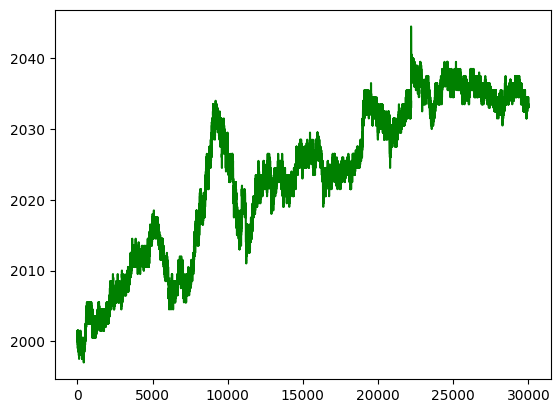

In [26]:
plt.plot(whole_kelp_price['mid_price'], color='green')

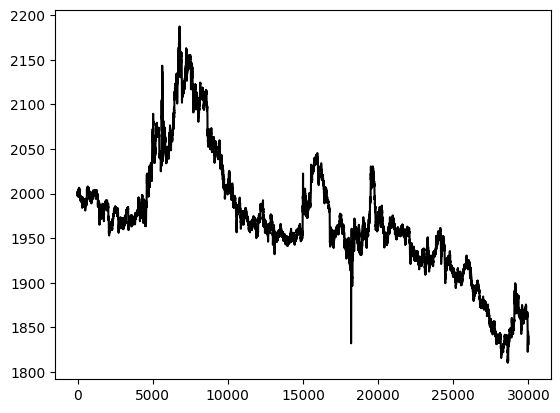

In [27]:
plt.plot(whole_ink_price['mid_price'], color='black')

In [28]:
whole_kelp_price['mid_price'].mean()

np.float64(2023.4764666666667)

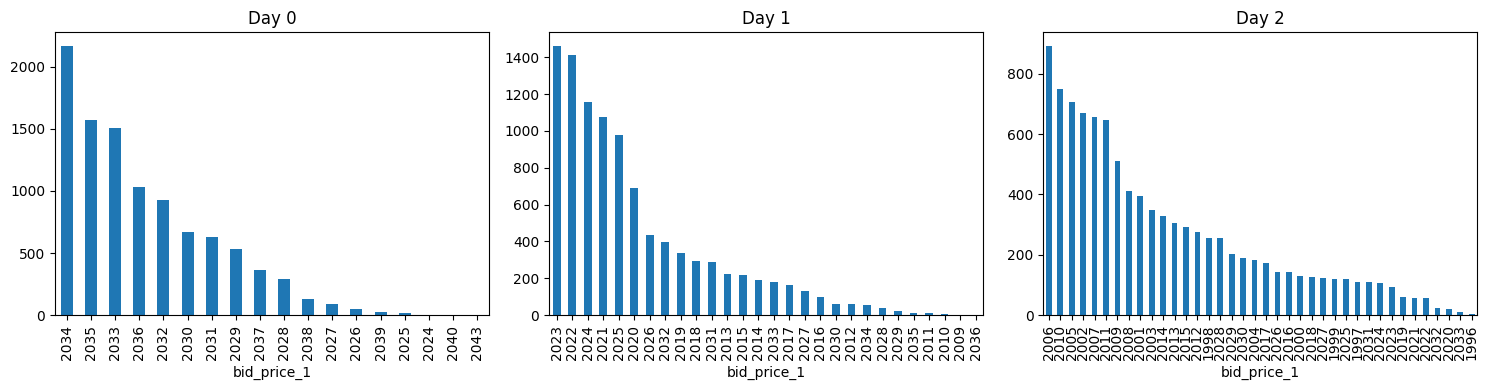

In [29]:
# best bid price frequency
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

kelp_price_day_0["bid_price_1"].value_counts().plot(kind='bar', ax=axes[0], title='Day 0')
kelp_price_day_1["bid_price_1"].value_counts().plot(kind='bar', ax=axes[1], title='Day 1')
kelp_price_day_2["bid_price_1"].value_counts().plot(kind='bar', ax=axes[2], title='Day 2')

plt.tight_layout()
plt.show()

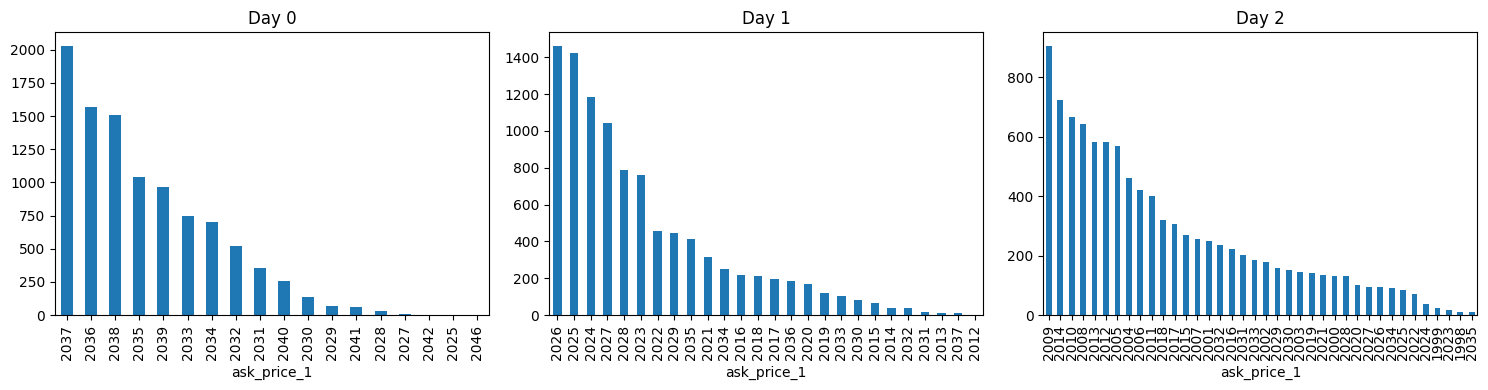

In [30]:
# best bid price frequency
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

kelp_price_day_0["ask_price_1"].value_counts().plot(kind='bar', ax=axes[0], title='Day 0')
kelp_price_day_1["ask_price_1"].value_counts().plot(kind='bar', ax=axes[1], title='Day 1')
kelp_price_day_2["ask_price_1"].value_counts().plot(kind='bar', ax=axes[2], title='Day 2')

plt.tight_layout()
plt.show()

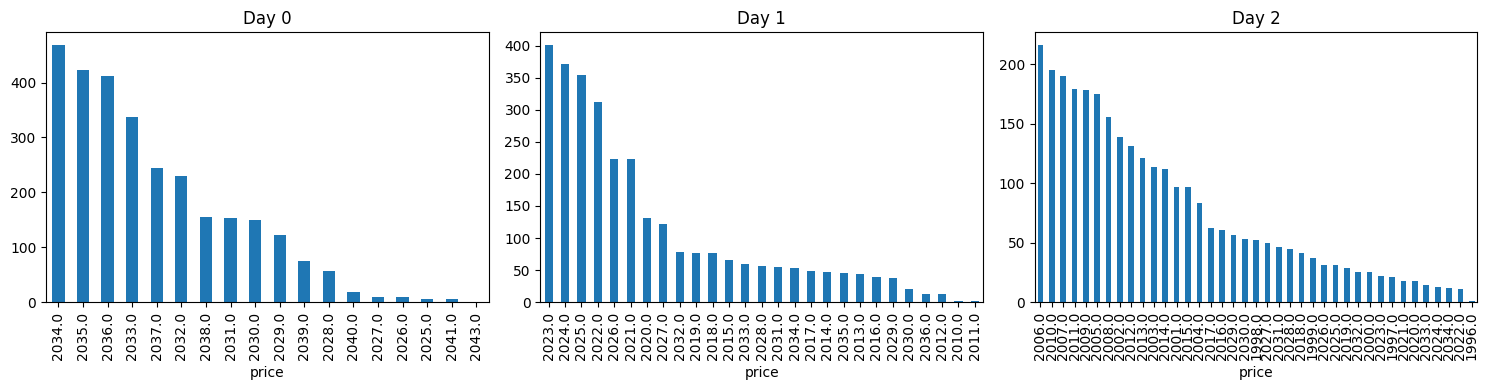

In [31]:
# trade price frequency
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

kelp_trade_day_0["price"].value_counts().plot(kind='bar', ax=axes[0], title='Day 0')
kelp_trade_day_1["price"].value_counts().plot(kind='bar', ax=axes[1], title='Day 1')
kelp_trade_day_2["price"].value_counts().plot(kind='bar', ax=axes[2], title='Day 2')

plt.tight_layout()
plt.show()